In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

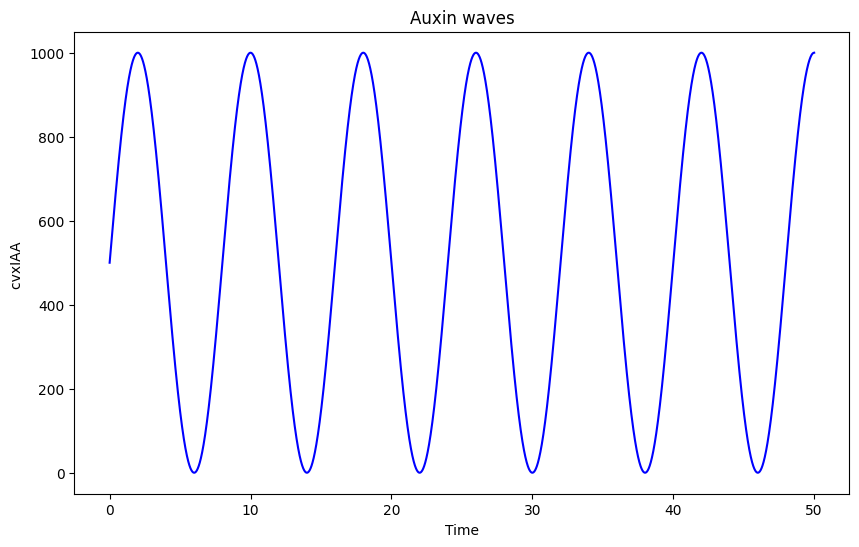

In [2]:
t=np.linspace(0, 3000, 9000)
cvx = 500 * np.sin(np.pi * t/240) + 500

plt.figure(figsize=(10, 6))
plt.plot(t/60, cvx, c='blue')
plt.xlabel('Time')
plt.ylabel('cvxIAA ')
plt.title('Auxin waves')
plt.show()

## Original model

$$
\begin{align}
    \frac{dm}{dt} &= 0.48 \cdot F_1(A, AI, AA) - 0.003 \cdot m \\
    \frac{dA}{dt} &= -2 \cdot 0.5 \cdot A^2 + 2 \cdot 0.44 \cdot AA - A \cdot I + 0.072 \cdot AI \\
    \frac{dI}{dt} &= 4 \cdot m - A \cdot I + 0.072 \cdot AI - 5.75 \cdot I \cdot Ta + 0.045 \cdot TaI - 0.003 \cdot I \\
    \frac{dT}{dt} &= -0.00082 \cdot T \cdot a + 0.33 \cdot Ta \\
    \frac{dTa}{dt} &= 0.00082 \cdot T \cdot a - 0.33 \cdot Ta - 5.75 \cdot Ta \cdot I + (0.045 + 0.9) \cdot TaI \\
    \frac{dAA}{dt} &= 0.5 \cdot A^2 - 0.44 \cdot AA \\
    \frac{dAI}{dt} &= A \cdot I - 0.072 \cdot AI \\
    \frac{dTaI}{dt} &= 5.75 \cdot Ta \cdot I - (0.045 + 0.9) \cdot TaI \\
    \frac{da}{dt} &= -0.00082 \cdot T \cdot a + 0.33 \cdot Ta - 0.1 \cdot a
\end{align}
$$

$$
F_1(A, AI, AA) = \frac{0.5 \cdot \frac{A}{100} + \frac{AA}{100} + 0.001}{1 + \frac{A}{100} + \frac{AA}{100} + \frac{AI}{100}}
$$

In [3]:
def F1(A,AI,AA):
    return (0.5*A/100+AA/100)/(1+A/100+AA/100+AI/100) + 0.001/(1+A/100+AA/100+AI/100)

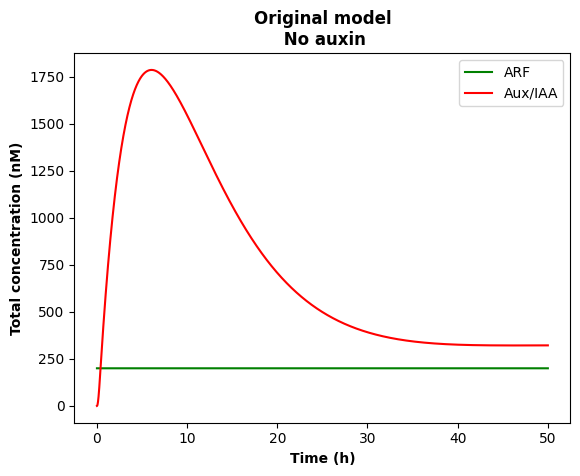

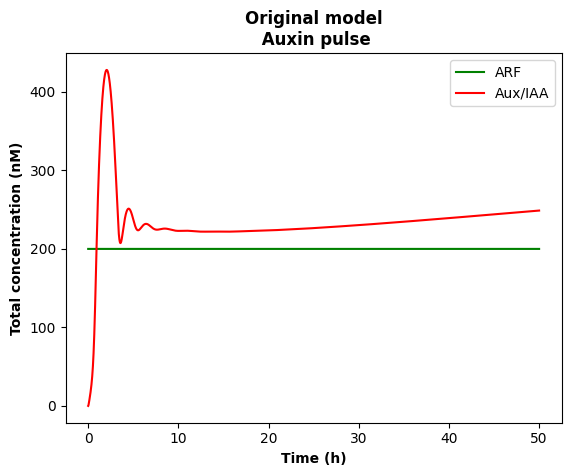

In [4]:
def grigolon_model(y, t, F1):
    m, A, I, T, Ta, AA, AI, TaI, a = y

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = -2*0.5*A*A + 2*0.44*AA - 1*A*I + 0.072*AI
    dI = 4*m - 1*A*I + 0.072*AI - 5.75*I*Ta + 0.045*TaI - 0.003*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - 0.44*AA
    dAI = 1*A*I - 0.072*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    da = -0.00082*T*a + 0.33*Ta - 0.1*a
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, da]

t=np.linspace(0, 3000, 9000)

for a0 in (0,1000):
  y0 = [0, 200, 0, 100, 0, 0, 0, 0, a0]
  sol = odeint(grigolon_model, y0, t, args=(F1,))
  m = sol[:, 0]
  A = sol[:, 1]
  I = sol[:, 2]
  T = sol[:, 3]
  Ta = sol[:, 4]
  AA = sol[:, 5]
  AI = sol[:, 6]
  TaI = sol[:, 7]
  a = sol[:, 8]

  plt.xlabel('Time (h)', weight='bold')
  plt.ylabel('Total concentration (nM)', weight='bold')
  plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
  plt.plot(t/60, I + AI+ TaI, label='Aux/IAA', c='red')
  plt.legend()
  if a0 == 0:
    plt.title('Original model\n No auxin', weight='bold')
  else:
    plt.title('Original model\n Auxin pulse', weight='bold')
  plt.show()

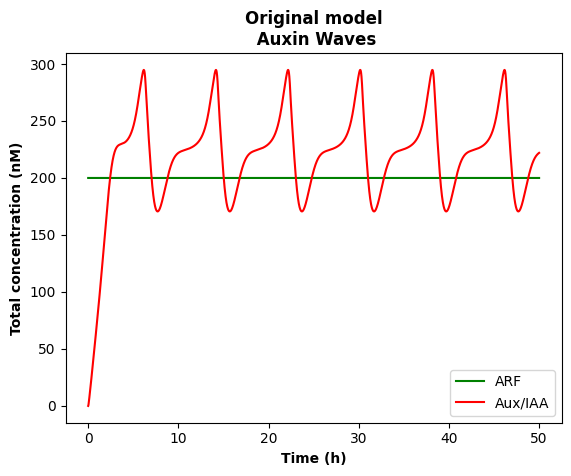

In [5]:
def grigolon_model_waves(y, t, F1):
    m, A, I, T, Ta, AA, AI, TaI = y
    a = 500 * np.sin(np.pi * t/240) + 500

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = -2*0.5*A*A + 2*0.44*AA - 1*A*I + 0.072*AI
    dI = 4*m - 1*A*I + 0.072*AI - 5.75*I*Ta + 0.045*TaI - 0.003*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - 0.44*AA
    dAI = 1*A*I - 0.072*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI]


t=np.linspace(0, 3000, 9000)

y0 = [0, 200, 0, 100, 0, 0, 0, 0]
sol = odeint(grigolon_model_waves, y0, t, args=(F1,))
m = sol[:, 0]
A = sol[:, 1]
I = sol[:, 2]
T = sol[:, 3]
Ta = sol[:, 4]
AA = sol[:, 5]
AI = sol[:, 6]
TaI = sol[:, 7]

plt.xlabel('Time (h)', weight='bold')
plt.ylabel('Total concentration (nM)', weight='bold')
plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
plt.plot(t/60, I + AI+ TaI, label='Aux/IAA', c='red')
plt.legend()
plt.title('Original model\n Auxin Waves', weight='bold')
plt.show()

## Adapted model

Changes to the original model highlighted in red:

$$
\begin{align}
    \frac{dm}{dt} &= 0.48 \cdot F_1(A, AI, AA) - 0.003 \cdot m \\
    \frac{dA}{dt} &= \color{red}{2 \cdot m} \color{black} - 2 \cdot 0.5 \cdot A^2 + 2 \cdot \color{red}{(0.44 + 0.05)} \color{black} \cdot AA - A \cdot I + 0.072 \cdot AI \color{red}{- 0.1 \cdot A} \\
    \frac{dI}{dt} &= \color{red}{2 \cdot m} \color{black} - A \cdot I + \color{red}{(0.072 + 0.1)} \cdot AI \color{black} - 5.75 \cdot I \cdot Ta + 0.045 \cdot TaI \color{red}{- 0.05 \cdot I} \\
    \frac{dT}{dt} &= -0.00082 \cdot T \cdot a + 0.33 \cdot Ta \\
    \frac{dTa}{dt} &= 0.00082 \cdot T \cdot a - 0.33 \cdot Ta - 5.75 \cdot Ta \cdot I + (0.045 + 0.9) \cdot TaI
\end{align}
$$

$$
\begin{align}
    \frac{dAA}{dt} &= 0.5 \cdot A^2 \color{red}{ - (0.44 + 0.1) \cdot AA - 0.003 \cdot AA}\\
    \frac{dAI}{dt} &= A \cdot I \color{red}{ - (0.072 + 0.1) \cdot AI - 0.003 \cdot AI}
\end{align}
$$


$$
\begin{align}
    \frac{dTaI}{dt} &= 5.75 \cdot Ta \cdot I - (0.045 + 0.9) \cdot TaI
\end{align}
$$


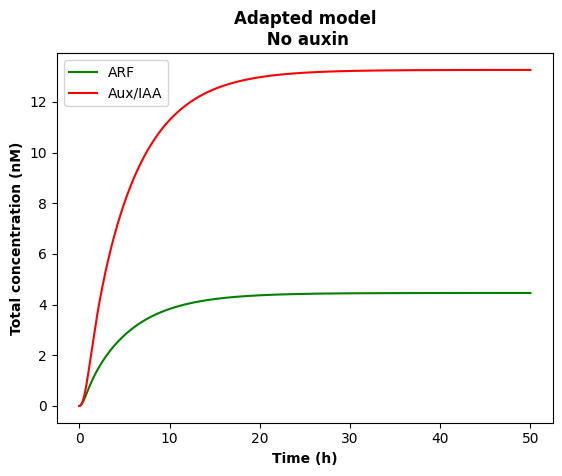

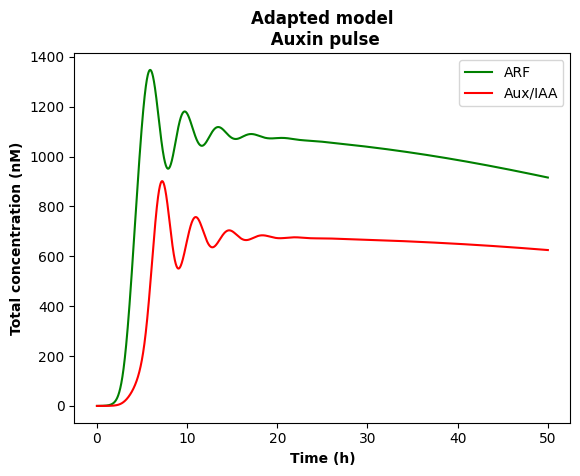

In [6]:
def adapted_model(y, t, F1):
    m, A, I, T, Ta, AA, AI, TaI, a= y

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = 2*m - 2*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + 0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    da = -0.00082*T*a + 0.33*Ta - 0.001*a
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, da]

t=np.linspace(0, 3000, 9000)

for a0 in (0,1000):
  y0 = [0, 0, 0, 100, 0, 0, 0, 0, a0]
  sol = odeint(adapted_model, y0, t, args=(F1,))
  m = sol[:, 0]
  A = sol[:, 1]
  I = sol[:, 2]
  T = sol[:, 3]
  Ta = sol[:, 4]
  AA = sol[:, 5]
  AI = sol[:, 6]
  TaI = sol[:, 7]
  a = sol[:, 8]

  plt.xlabel('Time (h)', weight='bold')
  plt.ylabel('Total concentration (nM)', weight='bold')
  plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
  plt.plot(t/60, I + AI+ TaI, label='Aux/IAA', c='red')
  plt.legend()
  if a0 == 0:
    plt.title('Adapted model\n No auxin', weight='bold')
  else:
    plt.title('Adapted model\n Auxin pulse', weight='bold')
  plt.show()

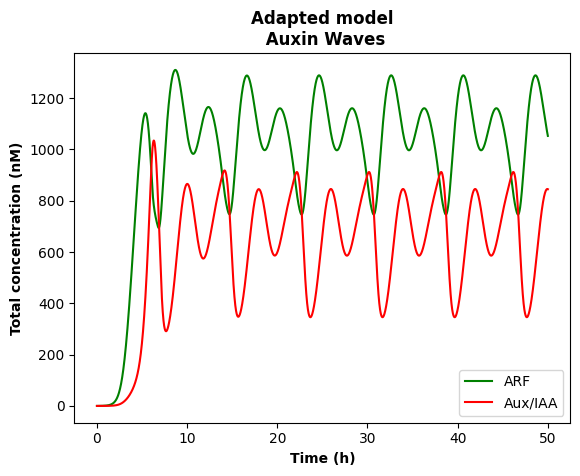

In [14]:
def adapted_model_waves(y, t, F1):
    m, A, I, T, Ta, AA, AI, TaI= y
    a = 500 * np.sin(np.pi * t/240) + 500

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = 2*m - 2*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + 0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI]

t=np.linspace(0, 3000, 9000)

y0 = [0, 0, 0, 100, 0, 0, 0, 0]
sol = odeint(adapted_model_waves, y0, t, args=(F1,))
m = sol[:, 0]
A = sol[:, 1]
I = sol[:, 2]
T = sol[:, 3]
Ta = sol[:, 4]
AA = sol[:, 5]
AI = sol[:, 6]
TaI = sol[:, 7]

plt.xlabel('Time (h)', weight='bold')
plt.ylabel('Total concentration (nM)', weight='bold')
plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
plt.plot(t/60, I + AI + TaI, label='Aux/IAA', c='red')
plt.legend()
plt.title('Adapted model\n Auxin Waves', weight='bold')
plt.show()

## cAMP models

ODE for cAMP:

$$
\frac{dC}{dt} = r \cdot TaI - 0.015 \cdot C
$$

### Version 1: Action on ARF activity

Changes apply only to the promoter function:

$$
F_1(A, AI, AA, \color{red}{C}) = \frac{\color{red}{(C \cdot k)} \times \left(0.5 \frac{A}{100} + \frac{AA}{100}\right) + 0.001}{1 + \frac{A}{100} + \frac{AA}{100} + \frac{AI}{100}}
$$

In [8]:
def F1_cAMP(A,AI,AA,C):
    return (C*k)*(0.5*A/100+AA/100)/(1+A/100+AA/100+AI/100) + 0.01/(1+A/100+AA/100+AI/100)

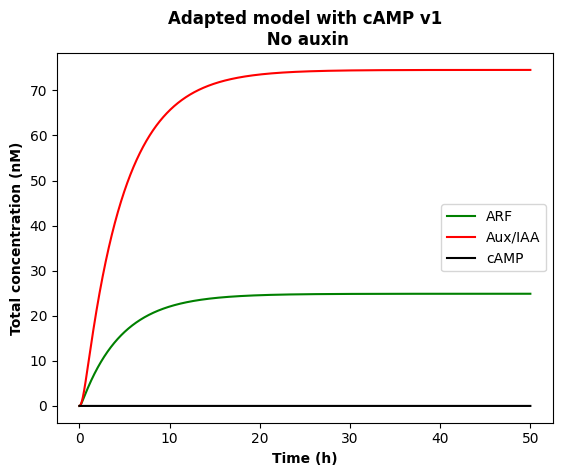

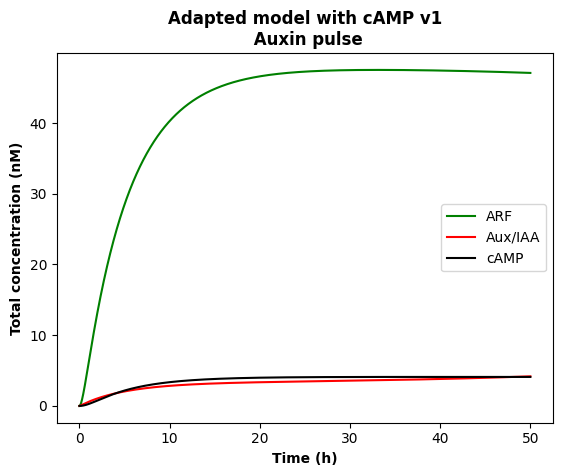

In [9]:
def adapted_model_cAMP1(y, t, F1, r):
    m, A, I, T, Ta, AA, AI, TaI, a, C = y

    dm = 0.48*F1_cAMP(A,AI,AA,C)-0.003*m
    dA = 2*m - 2*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + 0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    da = -0.00082*T*a + 0.33*Ta - 0.001*a
    dC = r*TaI - 0.015*C
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, da, dC]

r, k= [0.02,0.001]
t=np.linspace(0, 3000, 9000)

for a0 in (0,1000):
  y0 = [0, 0, 0, 100, 0, 0, 0, 0, a0, 0]
  sol = odeint(adapted_model_cAMP1, y0, t, args=(F1, r))
  m = sol[:, 0]
  A = sol[:, 1]
  I = sol[:, 2]
  T = sol[:, 3]
  Ta = sol[:, 4]
  AA = sol[:, 5]
  AI = sol[:, 6]
  TaI = sol[:, 7]
  a = sol[:, 8]
  C = sol[:, 9]

  plt.xlabel('Time (h)', weight='bold')
  plt.ylabel('Total concentration (nM)', weight='bold')
  plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
  plt.plot(t/60, I + AI + TaI, label='Aux/IAA', c='red')
  plt.plot(t/60, C, label='cAMP', c='black')
  plt.legend()
  if a0 == 0:
    plt.title('Adapted model with cAMP v1\n No auxin', weight='bold')
  else:
    plt.title('Adapted model with cAMP v1\n Auxin pulse', weight='bold')
  plt.show()

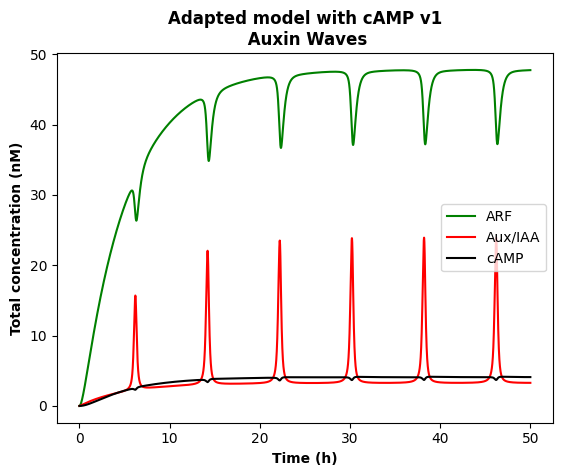

In [10]:
def adapted_model_cAMP1_waves(y, t, F1, r):
    m, A, I, T, Ta, AA, AI, TaI, C = y
    a = 500 * np.sin(np.pi * t/240) + 500

    dm = 0.48*F1_cAMP(A,AI,AA,C)-0.003*m
    dA = 2*m - 2*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + 0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = 0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    dC = r*TaI - 0.015*C
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, dC]

r, k= [0.02,0.001]
t=np.linspace(0, 3000, 9000)

y0 = [0, 0, 0, 100, 0, 0, 0, 0, 0]
sol = odeint(adapted_model_cAMP1_waves, y0, t, args=(F1, r))
m = sol[:, 0]
A = sol[:, 1]
I = sol[:, 2]
T = sol[:, 3]
Ta = sol[:, 4]
AA = sol[:, 5]
AI = sol[:, 6]
TaI = sol[:, 7]
C = sol[:, 8]

plt.xlabel('Time (h)', weight='bold')
plt.ylabel('Total concentration (nM)', weight='bold')
plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
plt.plot(t/60, I + AI + TaI, label='Aux/IAA', c='red')
plt.plot(t/60, C, label='cAMP', c='black')
plt.legend()
plt.title('Adapted model with cAMP v1\n Auxin Waves', weight='bold')
plt.show()

### Version 2: Action on regulatory complex stability

Changed ODEs are shown with changes in red:

$$
\begin{aligned}
\frac{dA}{dt} &= 2m - 2 \cdot \color{red}{(C \cdot k)} \cdot 0.5 \cdot A^2 + 2(0.44+0.05) AA - A \cdot I + \color{red}{(C \cdot k)} \cdot 0.072 \cdot AI - 0.1 A \\
\frac{dI}{dt} &= 2m - A \cdot I + \color{red}{(C \cdot k)} (0.072 + 0.1) AI - 5.75 I Ta + 0.045 TaI - 0.05 I \\
\frac{dAA}{dt} &= \color{red}{(C \cdot k)} \cdot 0.5 \cdot A^2 - (0.44 + 0.1) AA - 0.003 AA \\
\frac{dAI}{dt} &= A \cdot I - \color{red}{(C \cdot k)} (0.072 + 0.1) AI - 0.003 AI
\end{aligned}
$$


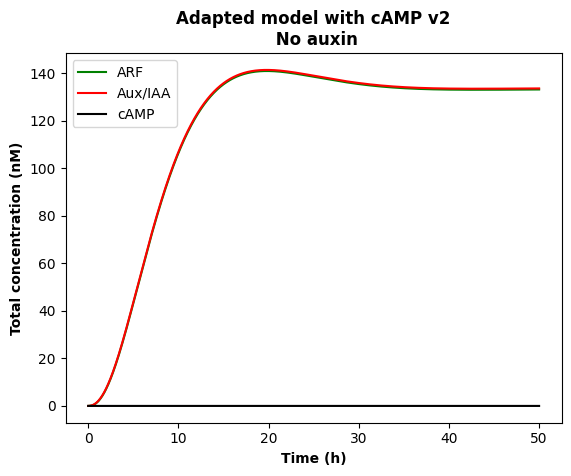

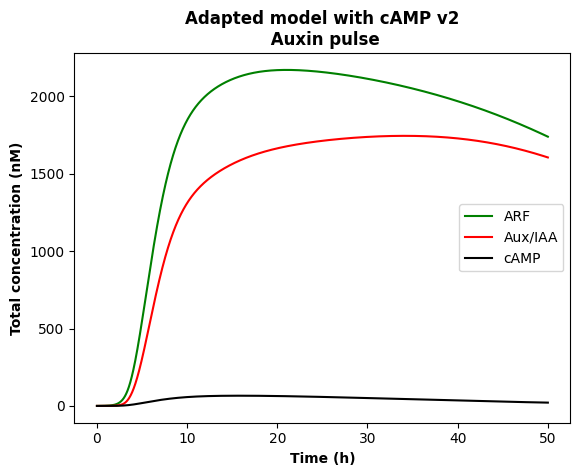

In [11]:
def adapted_model_cAMP2(y, t, F1, r):
    m, A, I, T, Ta, AA, AI, TaI, a, C = y

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = 2*m - 2*(C*k)*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + (C*k)*0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (C*k)*(0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = (C*k)*0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (C*k)*(0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    da = -0.00082*T*a + 0.33*Ta - 0.001*a
    dC = r*TaI - 0.015*C
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, da, dC]

r, k= [0.02,0.001]
t=np.linspace(0, 3000, 9000)

for a0 in (0,1000):
  y0 = [0, 0, 0, 100, 0, 0, 0, 0, a0, 0]
  sol = odeint(adapted_model_cAMP2, y0, t, args=(F1, r))
  m = sol[:, 0]
  A = sol[:, 1]
  I = sol[:, 2]
  T = sol[:, 3]
  Ta = sol[:, 4]
  AA = sol[:, 5]
  AI = sol[:, 6]
  TaI = sol[:, 7]
  a = sol[:, 8]
  C = sol[:, 9]

  plt.xlabel('Time (h)', weight='bold')
  plt.ylabel('Total concentration (nM)', weight='bold')
  plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
  plt.plot(t/60, I + AI + TaI, label='Aux/IAA', c='red')
  plt.plot(t/60, C, label='cAMP', c='black')
  plt.legend()
  if a0 == 0:
    plt.title('Adapted model with cAMP v2\n No auxin', weight='bold')
  else:
    plt.title('Adapted model with cAMP v2\n Auxin pulse', weight='bold')
  plt.show()

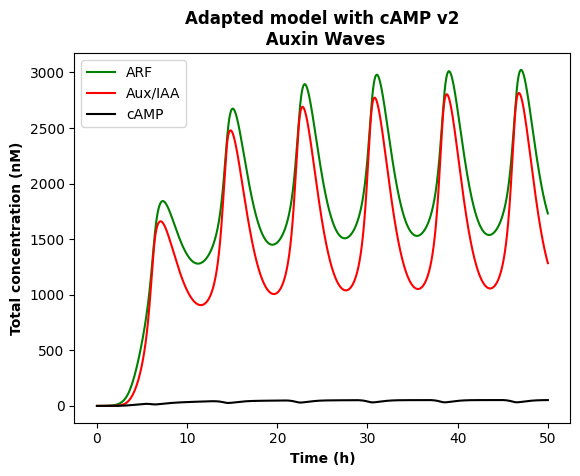

In [13]:
def adapted_model_cAMP2_waves(y, t, F1, r):
    m, A, I, T, Ta, AA, AI, TaI, C = y
    a = 500 * np.sin(np.pi * t/240) + 500

    dm = 0.48*F1(A,AI,AA)-0.003*m
    dA = 2*m - 2*(C*k)*0.5*A*A + 2*(0.44+0.05)*AA - 1*A*I + (C*k)*0.072*AI - 0.1*A
    dI = 2*m - 1*A*I + (C*k)*(0.072+0.1)*AI - 5.75*I*Ta + 0.045*TaI - 0.05*I
    dT = -0.00082*T*a + 0.33*Ta
    dTa = 0.00082*T*a - 0.33*Ta - 5.75*Ta*I + (0.045+0.9)*TaI
    dAA = (C*k)*0.5*A*A - (0.44+0.1)*AA - 0.003*AA
    dAI = 1*A*I - (C*k)*(0.072+0.1)*AI -0.003*AI
    dTaI = 5.75*Ta*I - (0.045+0.9)*TaI
    dC = r*TaI - 0.015*C
    return [dm, dA, dI, dT, dTa, dAA, dAI, dTaI, dC]

r, k= [0.02,0.001]
t=np.linspace(0, 3000, 9000)

y0 = [0, 0, 0, 100, 0, 0, 0, 0, 0]
sol = odeint(adapted_model_cAMP2_waves, y0, t, args=(F1, r))
m = sol[:, 0]
A = sol[:, 1]
I = sol[:, 2]
T = sol[:, 3]
Ta = sol[:, 4]
AA = sol[:, 5]
AI = sol[:, 6]
TaI = sol[:, 7]
C = sol[:, 8]

plt.xlabel('Time (h)', weight='bold')
plt.ylabel('Total concentration (nM)', weight='bold')
plt.plot(t/60, A + 2*AA + AI, label='ARF', c='green')
plt.plot(t/60, I + AI + TaI, label='Aux/IAA', c='red')
plt.plot(t/60, C, label='cAMP', c='black')
plt.legend()
plt.title('Adapted model with cAMP v2\n Auxin Waves', weight='bold')
plt.show()